# Participant report

This section aims at analyzing the specificity of the app through the aalysis of the DDLD samples 

1) We train the model using NT toddlers and ASD toddlers. 
2) We see whether the DDLD are classified among the NT or ASD groups.

3) We train the model with ASD and non-ASD
4) We see whether the app is able to classify between both

In 1) and 2), what are learned are the autistic and nt regions of a high dimensional space that distinguishes both groups, and the goal is to assess whether the ddld fall into the asd or nt parts. If they mostly fall into the NT category, then it would mean that the app have large specificity, ie the app features are distinguishing well asd vs non asd, which is specificity to autism screening. 

In 3) and 4), If the performances of the asd screening decreases, compared to training with only ASD, it seems to mean that the ASD and DDLD are somehow close and so the app specificity to DDLD is lower. 

It might be that only one of the two scenario might be necessary to assess the specificity of the app, but let's see. Guillermo proposed to analyze the performances on ASD+DDLD and separately. I think this means to do:

1) Train NT vs ASD+DDLD and see the performances: this analyze the ability of the app to screen for developmental concerns. 
2) Train NT vs DDLD and see ability to screen for DDLD
3) See if adding the DDLD to NT when training increases ASD screening perfromances. 


2) We can also try multi-class classification to see whether we can actually distinguis the three! 


TODO: We can try to see chich features elpe the most to discriminate NT from DDLD

In [41]:
run init.ipynb

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Done.


In [113]:
xgboost_hyperparameters = {'scale_pos_weight':False,#np.sum(data.y_train==0)/np.sum(data.y_train==1), 
                            'max_depth' : 3,
                            'learning_rate' : 0.15, 
                            'gamma': 0.1,
                            'n_estimators': 200,
                            'min_child_weight': 1,
                            'reg_lambda': 0.1}
    
use_weight = False
if use_weight:
    weighted_confidence_score = np.load(os.path.join(DATA_DIR, 'weight_multimodal.npy'))
else:
    weighted_confidence_score = None
    
    
df =  pd.read_csv(AUTISM_DATA_PATH)

data = Dataset(df=df, 
               missing_data_handling='imputation',
               imputation_method='constant',
               sampling_method='without',
               scenario = 'multimodal_2023_regular_ddld', 
               positive_class = [1],
               features_name = deepcopy(DEFAULT_PREDICTORS_BY_TYPES['All']),
               scale_data=False, 
               use_missing_indicator_variables=False, #USE_MISSING_INDICATOR_PREDICTORS,
               verbosity=1, 
               proportion_train=1)

exp = Experiments(data.dataset_name,
                  dataset=data, 
                  approach='xgboost', 
                  previous_experiment=None,        
                  debug=False, 
                  experiment_folder_name='PAPER', 
                  model_hyperparameters=xgboost_hyperparameters,
                  experiment_name = 'FINAL',
                  verbosity=1, 
                  save_experiment=False)


475 administrations left.


,id
diagnosis,
0.0,328
1.0,49
2.0,98


**We first need to retrieve the participant's data**

377 administrations left.


,id
diagnosis,
0.0,328
1.0,49


,experiment_name,AUROC,AUC-PR,AUC-PR-Gain,AUC-PR-Corrected,AUC-PR-Gain-Corrected,F1 score (2 PPVxTPR/(PPV+TPR)),F1 score Corrected,F2,F2 Corrected,Accuracy,Matthews correlation coefficient (MCC),"Sensitivity, recall, hit rate, or true positive rate (TPR)","Specificity, selectivity or true negative rate (TNR)",Precision or positive predictive value (PPV),Corrected Precision or positive predictive value (PPV),Negative predictive value (NPV),Miss rate or false negative rate (FNR),False discovery rate (FDR=1-PPV),False omission rate (FOR=1-NPV),TP,TN,FP,FN
0,FINAL,0.895,0.661,0.953,0.367,0.993,0.74,0.236,0.74,0.415,0.87,0.571,0.816,0.878,0.5,0.135,0.97,0.184,0.5,0.03,40,288,40,9


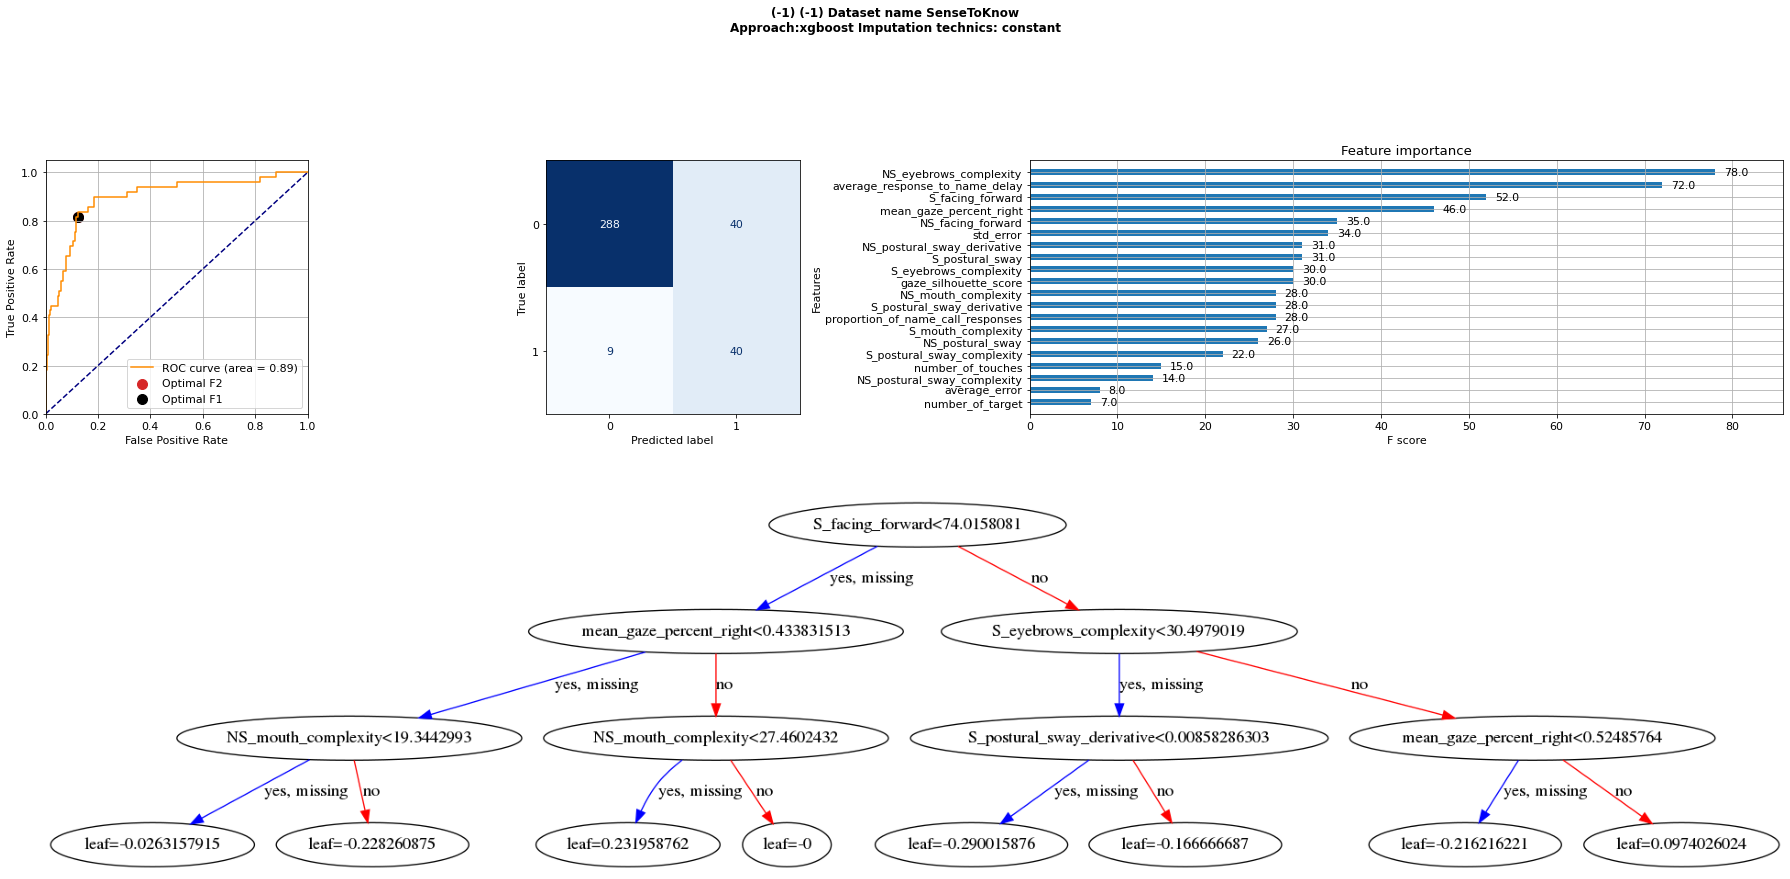

In [105]:
xgboost_hyperparameters = {'scale_pos_weight':True,#np.sum(data.y_train==0)/np.sum(data.y_train==1), 
                            'max_depth' : 3,
                            'learning_rate' : 0.15, 
                            'gamma': 0.1,
                            'n_estimators': 200,
                            'min_child_weight': 1,
                            'reg_lambda': 0.1}
    
use_weight = False
if use_weight:
    weighted_confidence_score = np.load(os.path.join(DATA_DIR, 'weight_multimodal.npy'))
else:
    weighted_confidence_score = None
    
    
df =  pd.read_csv(AUTISM_DATA_PATH)

data = Dataset(df=df, 
               missing_data_handling='imputation',
               imputation_method='constant',
               sampling_method='without',
               scenario = 'multimodal_2023_regular', 
               features_name = deepcopy(DEFAULT_PREDICTORS_BY_TYPES['All']),
               scale_data=False, 
               use_missing_indicator_variables=False, #USE_MISSING_INDICATOR_PREDICTORS,
               verbosity=1, 
               proportion_train=1)

exp = Experiments(data.dataset_name,
                  dataset=data, 
                  approach='xgboost', 
                  previous_experiment=None,        
                  debug=False, 
                  experiment_folder_name='PAPER', 
                  model_hyperparameters=xgboost_hyperparameters,
                  experiment_name = 'FINAL',
                  verbosity=1, 
                  save_experiment=False)

exp.fit_predict(num_cv=5, sample_weight=weighted_confidence_score)
exp.predictions_df['sample_weight'] = weighted_confidence_score
exp.plot()



In [103]:
exp.model

XGBClassifier(alpha=0, base_score=0.5, booster='gbtree', colsample_bylevel=0.8,
              colsample_bynode=1, colsample_bytree=0.8,
              enable_categorical=False, eval_metric='auc', gamma=0.1, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=12, num_parallel_tree=1,
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=0.1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, ...)

In [104]:
exp.model.objective

'binary:logistic'

In [100]:
exp.model

XGBClassifier(alpha=0, base_score=0.5, booster='gbtree', colsample_bylevel=0.8,
              colsample_bynode=1, colsample_bytree=0.8,
              enable_categorical=False, eval_metric='auc', gamma=0.1, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=12, num_parallel_tree=1,
              objective='multi:softprob', predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=0.1, scale_pos_weight=None, subsample=1,
              tree_method='exact', use_label_encoder=False, ...)

In [69]:
self = exp
y_true = self.predictions_df['y_true'].to_numpy()
y_pred = self.predictions_df['y_pred'].to_numpy()

In [94]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
th = 0.5
thresholds = sorted(np.unique(y_pred))

f2 = []
for th in thresholds:
    
    f2.append(fbeta_score(y_true, y_pred >= th, beta=2, average='weighted'))
    
f2_max, index_threshold, optimal_threshold = np.max(f2), np.argmax(f2), thresholds[ np.argmax(f2)]

print(f2_max, index_threshold, optimal_threshold)

0.6745527487626776 450 0.65515953


In [95]:
len(thresholds)

475

(array([368.,  24.,  18.,   5.,   8.,   4.,   6.,   4.,   1.,   4.,   2.,
          2.,   0.,   2.,   1.,   0.,   3.,   1.,   5.,   3.,   0.,   3.,
          4.,   2.,   5.]),
 array([1.32169580e-05, 3.98591235e-02, 7.97050297e-02, 1.19550936e-01,
        1.59396842e-01, 1.99242741e-01, 2.39088655e-01, 2.78934568e-01,
        3.18780452e-01, 3.58626366e-01, 3.98472279e-01, 4.38318193e-01,
        4.78164077e-01, 5.18010020e-01, 5.57855904e-01, 5.97701788e-01,
        6.37547731e-01, 6.77393615e-01, 7.17239499e-01, 7.57085443e-01,
        7.96931326e-01, 8.36777270e-01, 8.76623154e-01, 9.16469038e-01,
        9.56314981e-01, 9.96160865e-01], dtype=float32),
 <BarContainer object of 25 artists>)

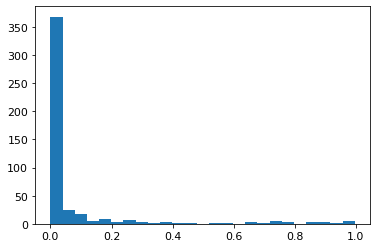

In [77]:
plt.hist(y_pred, bins=25)

In [91]:
from sklearn.metrics import fbeta_score



0.6716924735045805

In [86]:
classification_report(y_true, y_pred >= th, target_names=['NT', 'ASD', 'DDLD'], output_dict=True)['weighted avg']['f1-score']

0.6203734739352854

In [70]:
print(classification_report(y_true, y_pred >= th, target_names=['NT', 'ASD', 'DDLD']))

              precision    recall  f1-score   support

          NT       0.72      0.98      0.83       328
         ASD       0.62      0.37      0.46        49
        DDLD       0.00      0.00      0.00        98

    accuracy                           0.71       475
   macro avg       0.45      0.45      0.43       475
weighted avg       0.56      0.71      0.62       475



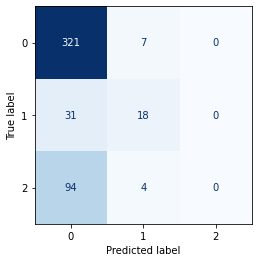

In [31]:
cm = confusion_matrix(y_true, y_pred>= th)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues');disp.im_.colorbar.remove()

In [ ]:
for i, comp in enumerate(comparisons):
    row = d[d['subgroup_raw'] == comp].iloc[0]


    # ROC CURVE
    y_true = row['y_true']
    y_pred = row['y_pred']


    fpr, tpr, thresholds = roc_curve(y_true, y_pred); roc_auc = auc(fpr, tpr)
    hanley_ci = compute_SD(roc_auc, np.sum(y_true==0), np.sum(y_true==1))

    axes[0].plot(fpr, tpr, '-', lw=1.5, label='{} AUC = {:.2f} +/- {:.2f})'.format(row['subgroup'], roc_auc, hanley_ci))
    axes[0].plot([0, 1], [0, 1], color='navy', lw=1.5, linestyle='--')
    axes[0].set_xlim([0.0, 1.0]); ax.set_ylim([0.0, 1.05]); ax.grid()
    axes[0].set_xlabel('False Positive Rate'); ax.set_ylabel('True Positive Rate')
    tprs_upper = np.minimum(tpr + hanley_ci, 1)
    tprs_lower = np.maximum(tpr - hanley_ci, 0)
    axes[0].fill_between(fpr, tprs_lower, tprs_upper,  alpha=.2)
    idx_threshold = np.argmin(np.abs(thresholds - exp.optimal_threshold))
    axes[0].scatter(fpr[idx_threshold], tpr[idx_threshold], color='tab:red', s=100, label="Optimal F2" if i==len(comparisons)-1 else None)

    axes[0].legend(loc='lower right', prop={'size':20})
    axes[0].set_title(comparisons_name, weight='bold', fontsize=18)


    # COnfusion matrix
    cm = np.array([[row['TN'], row['FP']], [row['FN'], row['TP']]]).astype(int)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues', ax=axes[i+1]);disp.im_.colorbar.remove()  
    axes[i+1].set_title("{}".format(row['subgroup']), weight='bold', fontsize=18)

Text(0.5, 1.0, 'Complete confusion matrix')

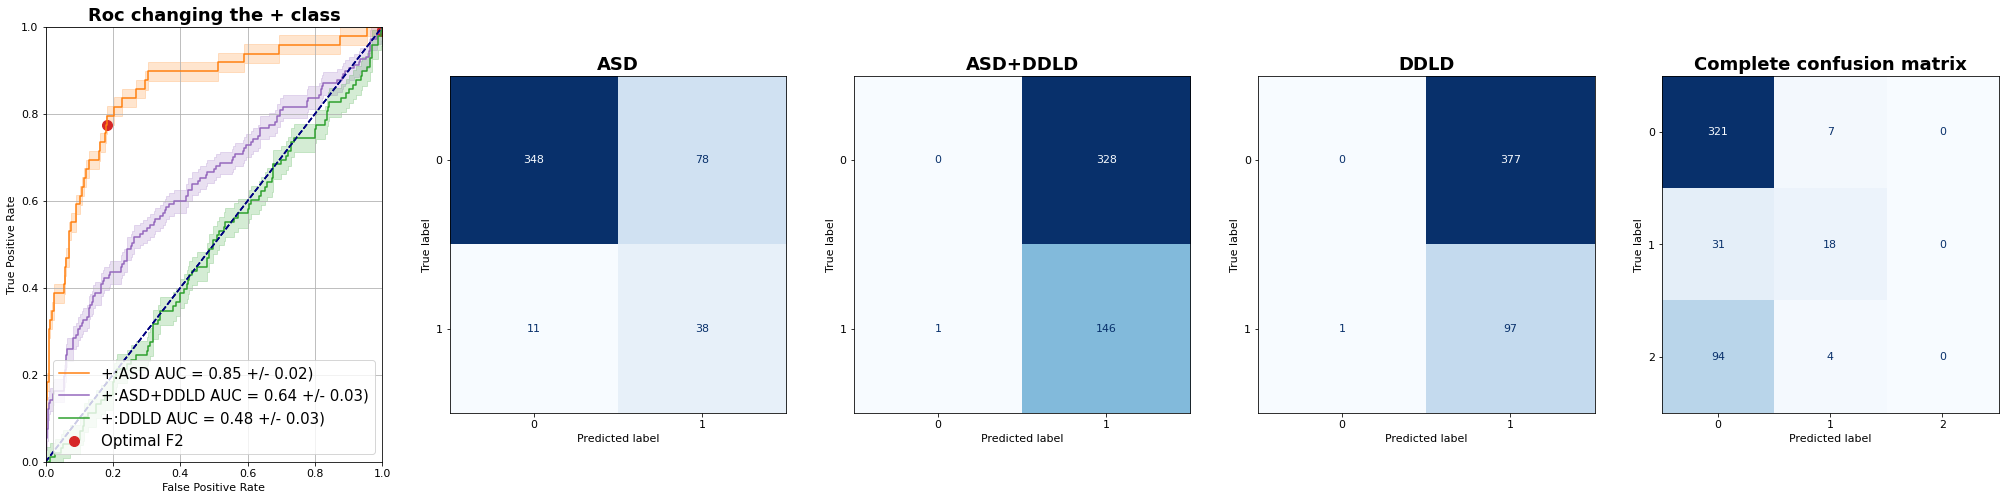

In [65]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
from utils import compute_SD, find_optimal_threshold
#creating a set of all the unique classes using the actual class list
unique_class = [0, 1, 2]
labels = ['NT', 'ASD', 'DDLD']
colors = ['tab:orange', 'tab:purple', 'tab:green']

fi, axes = plt.subplots(1, 5, figsize=(35, 8))

roc_auc_dict = {}
for i, (positive_class, label_positive) in enumerate(zip([[1], [1, 2], [2]], ['ASD', 'ASD+DDLD', 'DDLD'])):


    #marking the current class as 1 and all other classes as 0
    y_true_new = np.array([1 if x in positive_class else 0 for x in y_true])

    #using the sklearn metrics method to calculate the roc_auc_score
    roc_auc = roc_auc_score(y_true_new, y_pred)
    roc_auc_dict[per_class] = roc_auc


    fpr, tpr, thresholds = roc_curve(y_true_new, y_pred); roc_auc = auc(fpr, tpr)
    hanley_ci = compute_SD(roc_auc, np.sum(y_true_new==0), np.sum(y_true_new==1))
    
    
    # compute the best F1, F2, optimal threshold for the !F2! measure, and the index of the optimal threshold
    f1, f2, f1c, f2c, index_threshold_f1, index_threshold_f2, optimal_threshold = find_optimal_threshold(y_true_new, y_pred)
        
        
        

    axes[0].plot(fpr, tpr, '-', lw=1.5, color=colors[i], label='+:{} AUC = {:.2f} +/- {:.2f})'.format(label_positive, roc_auc, hanley_ci))
    axes[0].plot([0, 1], [0, 1], color='navy', lw=1.5, linestyle='--')
    axes[0].set_xlim([0.0, 1.0]); axes[0].set_ylim([0.0, 1.]); axes[0].grid()
    axes[0].set_xlabel('False Positive Rate'); axes[0].set_ylabel('True Positive Rate')
    tprs_upper = np.minimum(tpr + hanley_ci, 1)
    tprs_lower = np.maximum(tpr - hanley_ci, 0)
    axes[0].fill_between(fpr, tprs_lower, tprs_upper,  color=colors[i], alpha=.2)
    axes[0].scatter(fpr[index_threshold_f2], tpr[index_threshold_f2], color='tab:red', s=100, label="Optimal F2" if i == 2 else None)

    axes[0].legend(loc='lower right', prop={'size':15})
    axes[0].set_title('Roc changing the + class', weight='bold', fontsize=18)
    
    
    # COnfusion matrix
    cm = confusion_matrix(y_true_new, y_pred>= optimal_threshold)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues', ax=axes[i+1]);disp.im_.colorbar.remove()  
    axes[i+1].set_title("{}".format(label_positive), weight='bold', fontsize=18)


cm = confusion_matrix(y_true, y_pred>= th)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', ax=axes[4]);disp.im_.colorbar.remove()
axes[4].set_title("Complete confusion matrix", weight='bold', fontsize=18)

**Select a promising participant to showcase**

In [20]:
exp.predictions_df.sort_values(by='y_pred', ascending=False).head()

,mean_gaze_percent_right,gaze_silhouette_score,proportion_of_name_call_responses,average_response_to_name_delay,S_postural_sway,NS_postural_sway,S_postural_sway_derivative,NS_postural_sway_derivative,S_postural_sway_complexity,NS_postural_sway_complexity,S_facing_forward,NS_facing_forward,S_eyebrows_complexity,NS_eyebrows_complexity,S_mouth_complexity,NS_mouth_complexity,std_error,number_of_touches,number_of_target,average_error,Z_PlayingWithBlocks,Z_FunAtThePark,Z_BlowingBubbles,Z_RhymesAndToys,y_true,y_pred,TN,TP,FP,FN,pred_class,sample_weight
382,0.819843,0.531763,1.000000,0.767433,7.946785,5.887994,0.033473,0.032651,0.000000,0.000000,36.730425,49.274152,23.211527,17.513519,17.851734,13.564486,2.204124,16.0,16.0,4.969821,0.0,0.0,1.0,0.0,1.0,0.999173,0,1,0,0,TP,None
67,0.580661,0.461836,0.333333,0.934267,5.002257,1.275072,0.030330,0.005013,2.487151,1.609438,48.524315,60.136997,20.929317,26.090395,18.125196,26.626478,4.490219,6.0,6.0,6.745409,0.0,0.0,0.0,0.0,1.0,0.998772,0,1,0,0,TP,None
14,0.617876,0.514620,0.666667,1.735067,2.722279,3.209192,0.011716,0.013588,3.094245,0.000000,73.800057,53.170227,30.779673,18.292719,30.577063,14.939351,5.535775,22.0,15.0,9.086770,0.0,0.0,0.0,0.0,1.0,0.998469,0,1,0,0,TP,None
24,0.568528,0.273053,0.500000,1.568233,1.344965,0.418894,0.003942,0.001967,3.438220,2.125048,37.764991,41.570463,13.549890,17.672448,11.982748,15.101356,NaN,NaN,NaN,NaN,0.0,0.0,1.0,1.0,1.0,0.998377,0,1,0,0,TP,None
144,0.663503,0.589771,0.333333,3.036367,0.307655,0.280161,0.001071,0.000987,1.841305,3.459907,25.434845,55.207726,15.243877,21.309375,14.414402,22.974740,NaN,NaN,NaN,NaN,0.0,0.0,1.0,1.0,1.0,0.996711,0,1,0,0,TP,None


In [25]:
index_sample = 382

**Show the demographics and clinical data**

In [16]:
exp.dataset.df.iloc[index_sample:index_sample+1]

,id,diagnosis,language,app_version,subject,administration,features_extracted,face_tracking,age,timestamp,date,time,study,stimuli_version,sex,ethnicity,race,primary_education,asd_yn,mullen_el,mullen_fm,mullen_rl,mullen_vr,mullen_elc_std,ados_total,ados_rrb,ados_sa,srs_total_tscore,srs_social_awareness_tscore,srs_social_motivation_tscore,cbcl_scaleIV_score,cbcl_asd_score,mchat_total,mchat_final,mchat_result,BB_gaze_percent_right,BB_gaze_silhouette_score,S_gaze_percent_right,S_gaze_silhouette_score,FP_gaze_speech_correlation,FP_gaze_silhouette_score,proportion_of_name_call_responses,average_response_to_name_delay,valid_name_calls,FB_postural_sway,FB_postural_sway_derivative,DIGC_postural_sway,DIGC_postural_sway_derivative,DIGRRL_postural_sway,DIGRRL_postural_sway_derivative,ST_postural_sway,ST_postural_sway_derivative,MP_postural_sway,MP_postural_sway_derivative,PB_postural_sway,PB_postural_sway_derivative,BB_postural_sway,BB_postural_sway_derivative,RT_postural_sway,RT_postural_sway_derivative,MML_postural_sway,MML_postural_sway_derivative,PWB_postural_sway,PWB_postural_sway_derivative,FP_postural_sway,FP_postural_sway_derivative,number_of_touches,average_length,std_length,average_error,std_error,number_of_target,pop_rate,average_touch_duration,std_touch_duration,average_delay_to_pop,std_delay_to_pop,repeat_percentage,repeat_percentage_naive,double_tap,mean_velocity,std_velocity,average_force_applied,std_force_applied,average_accuracy_variation,accuracy_consistency,average_touches_per_target,std_touches_per_target,average_time_spent,std_time_spent,exploratory_percentage,validity_available,completed,StateOfTheChild,SiblingsInTheRoom,ShotsVaccines,Distractions,FamilyMemberDistract,PetDistract,PetNoiseDistract,DoorbellPhoneDistract,TVOnDistract,OtherDistract,SittingUp,Hungry,Diaper,AppTeamComment,Comments,path,FB_head_movement_complexity,DIGC_head_movement_complexity,DIGRRL_head_movement_complexity,ST_head_movement_complexity,MP_head_movement_complexity,PB_head_movement_complexity,BB_head_movement_complexity,RT_head_movement_complexity,MML_head_movement_complexity,PWB_head_movement_complexity,FP_head_movement_complexity,FB_facing_forward,DIGC_facing_forward,DIGRRL_facing_forward,ST_facing_forward,MP_facing_forward,PB_facing_forward,BB_facing_forward,RT_facing_forward,MML_facing_forward,PWB_facing_forward,FP_facing_forward,FB_eyebrows_complexity,DIGC_eyebrows_complexity,DIGRRL_eyebrows_complexity,ST_eyebrows_complexity,MP_eyebrows_complexity,PB_eyebrows_complexity,BB_eyebrows_complexity,RT_eyebrows_complexity,MML_eyebrows_complexity,PWB_eyebrows_complexity,FP_eyebrows_complexity,FB_mouth_complexity,DIGC_mouth_complexity,DIGRRL_mouth_complexity,ST_mouth_complexity,MP_mouth_complexity,PB_mouth_complexity,BB_mouth_complexity,RT_mouth_complexity,MML_mouth_complexity,PWB_mouth_complexity,FP_mouth_complexity,remote,chart_date,chart_age,asd_dx,asd_dx_conserv,ddld_dx,adhd_dx,id_dx,neurodev_dx,motor_dx,disruptive_dx,anxiety_dx,mood_dx,administration_number,S_postural_sway,NS_postural_sway,S_postural_sway_derivative,NS_postural_sway_derivative,gaze_silhouette_score,inv_S_gaze_percent_right,mean_gaze_percent_right,S_postural_sway_complexity,NS_postural_sway_complexity,S_facing_forward,NS_facing_forward,S_eyebrows_complexity,NS_eyebrows_complexity,S_mouth_complexity,NS_mouth_complexity,S_postural_sway_conf,NS_postural_sway_conf,S_postural_sway_derivative_conf,NS_postural_sway_derivative_conf,gaze_silhouette_score_conf,mean_gaze_percent_right_conf,S_facing_forward_conf,NS_facing_forward_conf,S_eyebrows_complexity_conf,NS_eyebrows_complexity_conf,S_mouth_complexity_conf,NS_mouth_complexity_conf,S_postural_sway_complexity_conf,NS_postural_sway_complexity_conf,RTN_conf,touch_conf,Z_mean_gaze_percent_right,Z_gaze_silhouette_score,Z_proportion_of_name_call_responses,Z_average_response_to_name_delay,Z_S_postural_sway,Z_NS_postural_sway,Z_S_postural_sway_derivative,Z_NS_postural_sway_derivative,Z_S_postural_sway_complexity,Z_NS_postural_sway_complexity

**Compute Shap Values (assuming LOOCV)**

In [32]:
shap_values = np.zeros_like(exp.shap_values.mean(axis=0))
for i in range(exp.shap_values.shape[0]):
    shap_values[i, :] = exp.shap_values[i, i, :]

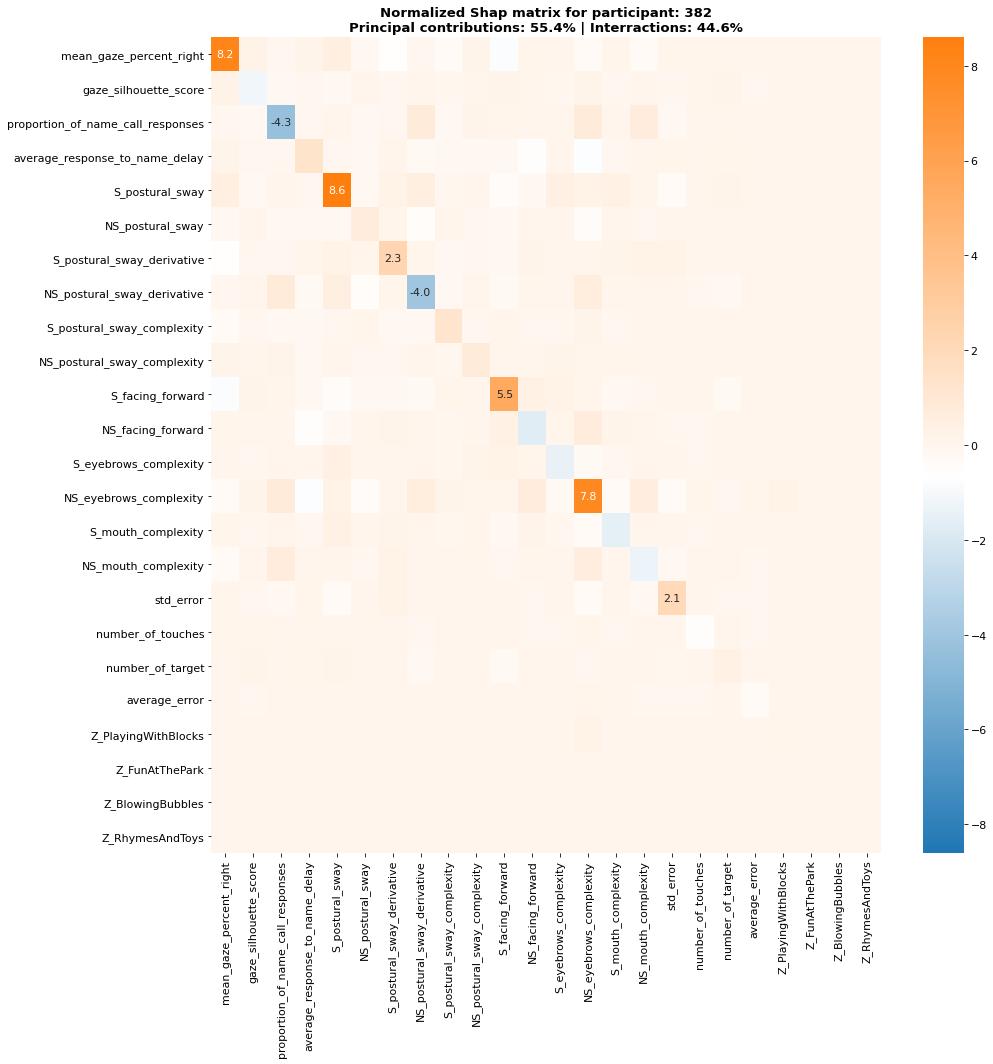

,total,main,interaction,first_interaction,first_interaction_name
NS_eyebrows_complexity,13.906024,7.795833,6.110191,0.755851,average_response_to_name_delay
S_postural_sway,12.297345,8.600631,3.696714,0.490219,mean_gaze_percent_right
mean_gaze_percent_right,12.12591,8.193795,3.932116,0.827978,S_facing_forward
S_facing_forward,8.676441,5.4959,3.180541,0.827979,mean_gaze_percent_right
proportion_of_name_call_responses,7.413683,4.3112,3.102483,0.789957,NS_postural_sway_derivative
NS_postural_sway_derivative,7.223991,4.021013,3.202978,0.789957,proportion_of_name_call_responses
S_postural_sway_derivative,4.712761,2.343349,2.369411,0.55006,mean_gaze_percent_right
NS_facing_forward,4.149236,1.698625,2.450611,0.738939,NS_eyebrows_complexity
average_response_to_name_delay,4.068166,1.302438,2.765728,0.755851,NS_eyebrows_complexity
std_error,3.697063,2.08247,1.614594,0.331683,NS_eyebrows_complexity


In [38]:

# Draw a random smaple and plot the shap matrix
matrix_shap = exp.shap_interaction_value[index_sample]*100

# Build the anotation matrix for ploting
max_value = np.max(np.abs(matrix_shap))
df_shap = pd.DataFrame(matrix_shap, columns = exp.features_name, index = exp.features_name)
df_shap_label = np.zeros_like(matrix_shap).astype(str)
for row in range(matrix_shap.shape[0]):
    for col in range(matrix_shap.shape[0]):

        if np.abs(matrix_shap[row, col]) > 2: 
            df_shap_label[row, col] = str(np.round(matrix_shap[row, col], 1))
        else:
            df_shap_label[row, col] = ""

principal_effect_sum = np.diag(np.abs(matrix_shap)).sum()
interaction_effect_sum = np.abs(matrix_shap).sum() - np.diag(np.abs(matrix_shap)).sum()

fi(15, 15)
plt.title("Normalized Shap matrix for participant: {}\nPrincipal contributions: {:.1f}% | Interractions: {:.1f}%".format(index_sample, principal_effect_sum, interaction_effect_sum), weight='bold')
sns.heatmap(df_shap, cmap=cmap, vmin=-max_value, vmax=max_value, fmt="", annot=df_shap_label)
plt.show()
display_interaction_summary(matrix_shap)


**Show the participant data into the distributions**

<AxesSubplot:xlabel='mean_gaze_percent_right', ylabel='Density'>

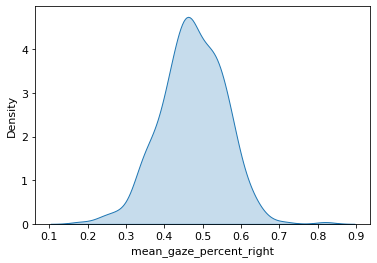

In [73]:
sns.kdeplot(data=exp.predictions_df, x=feat, common_norm=1, fill=True)


In [59]:
pip install --upgrade seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.2/288.2 kB 5.7 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.1
    Uninstalling seaborn-0.11.1:
      Successfully uninstalled seaborn-0.11.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
responsibly 0.1.3 requires matplotlib<3,>=2.2, but you have matplotlib 3.5.3 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [39]:
feat = exp.features_name[0]

In [52]:
n_asd = np.sum(exp.predictions_df['y_true'])
n_nt = np.sum(exp.predictions_df['y_true']==0)
n_tot = n_asd+n_nt

weights = [n_asd/n_tot if y==0 else n_nt/n_tot for y in exp.predictions_df['y_true']]
weights

[0.14432989690721648,
 0.14432989690721648,
 0.8556701030927835,
 0.14432989690721648,
 0.8556701030927835,
 0.14432989690721648,
 0.14432989690721648,
 0.14432989690721648,
 0.8556701030927835,
 0.14432989690721648,
 0.14432989690721648,
 0.8556701030927835,
 0.14432989690721648,
 0.14432989690721648,
 0.8556701030927835,
 0.14432989690721648,
 0.14432989690721648,
 0.14432989690721648,
 0.14432989690721648,
 0.14432989690721648,
 0.14432989690721648,
 0.8556701030927835,
 0.14432989690721648,
 0.14432989690721648,
 0.8556701030927835,
 0.14432989690721648,
 0.14432989690721648,
 0.14432989690721648,
 0.14432989690721648,
 0.14432989690721648,
 0.14432989690721648,
 0.14432989690721648,
 0.14432989690721648,
 0.14432989690721648,
 0.14432989690721648,
 0.14432989690721648,
 0.8556701030927835,
 0.14432989690721648,
 0.14432989690721648,
 0.14432989690721648,
 0.14432989690721648,
 0.14432989690721648,
 0.14432989690721648,
 0.14432989690721648,
 0.14432989690721648,
 0.144329896907216